# Zalando Clother Classification - Exploratory Data Analysis (EDA)

__Author: Fernández Hernández, Alberto__

__Date: 2023 - 10 - 25__

In [ ]:
# -- Libraries
from   tqdm              import tqdm
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import math
import gzip
import os

In [ ]:
# -- Constants
MAIN_PATH     = '/content/drive/MyDrive/Personal/CentricSoftware'
LABEL_MAPPING = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

CATEGORY_MAPPING = {
    "T-shirt/top": "Upper part",
    "Pullover": "Upper part",
    "Coat": "Upper part",
    "Shirt": "Upper part",
    "Trouser": "Bottom part",
    "Dress": "One piece",
    "Sandal": "Footwear",
    "Sneaker": "Footwear",
    "Ankle boot": "Footwear",
    "Bag": "Bags"
}

In [ ]:
f=gzip.open('/content/drive/MyDrive/Personal/CentricSoftware/t10k-images-idx3-ubyte.gz','rb')
file_content=f.read()

In [ ]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Load data

In [ ]:
X_train, y_train = load_mnist('/content/drive/MyDrive/Personal/CentricSoftware', kind='train')

X_train          = np.reshape(X_train, (X_train.shape[0],
                                        int(math.sqrt(X_train.shape[1])),
                                        int(math.sqrt(X_train.shape[1]))
                                        )
                   )

X_test, y_test   = load_mnist('/content/drive/MyDrive/Personal/CentricSoftware', kind='t10k')

X_test           = np.reshape(X_test, (X_test.shape[0],
                                        int(math.sqrt(X_test.shape[1])),
                                        int(math.sqrt(X_test.shape[1]))
                                        )
                   )

__Sample with train data__

Image nº 0


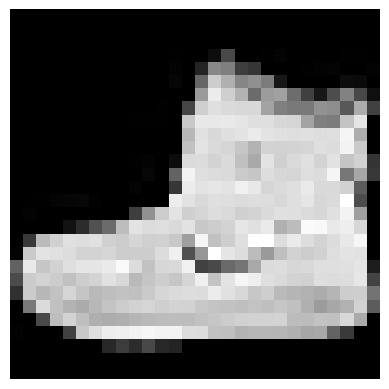



Image nº 1


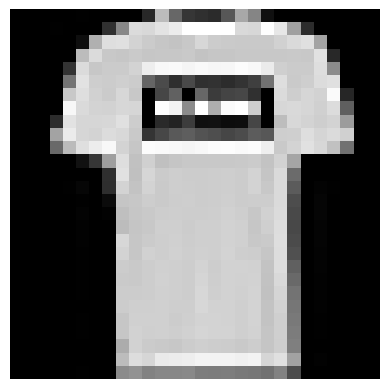



Image nº 2


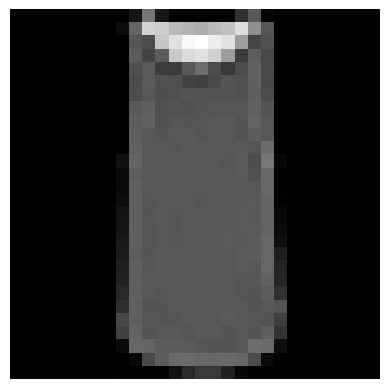



Image nº 3


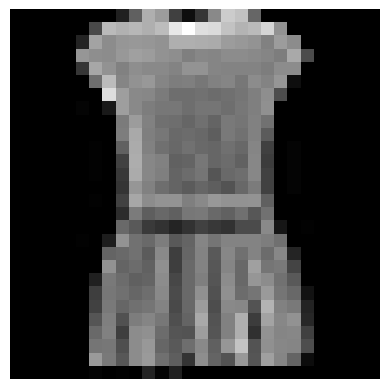



Image nº 4


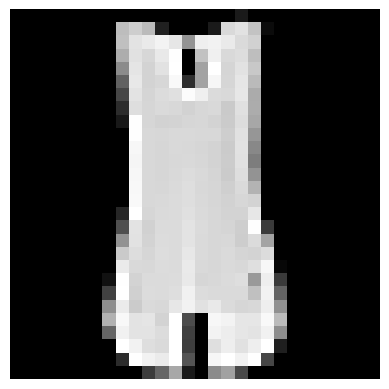

In [ ]:
for i in range(0, 5):
  print("Image nº {}".format(i))
  plt.imshow(X_train[i,:,:], cmap='gray')
  plt.axis('off')
  plt.show()
  print("\n")

__Sample with test data__

Image nº 0


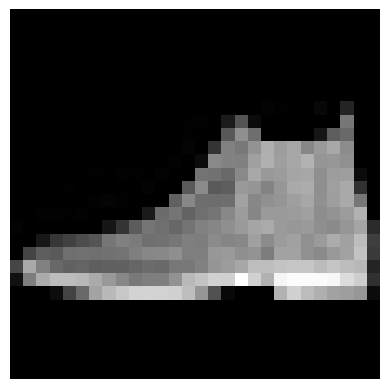



Image nº 1


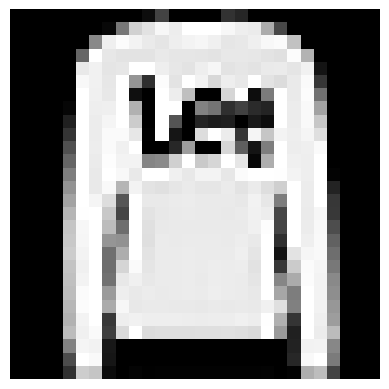



Image nº 2


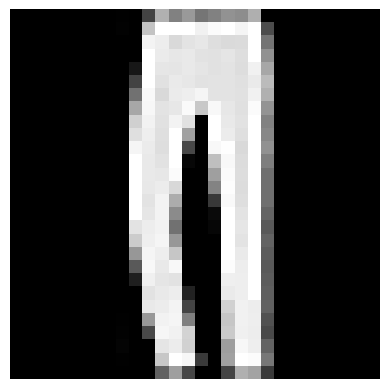



Image nº 3


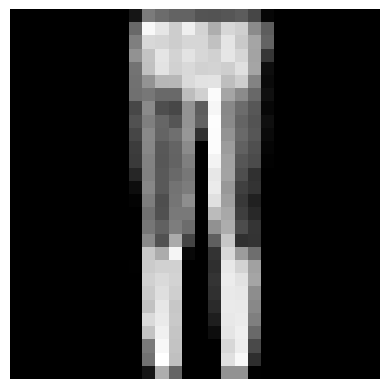



Image nº 4


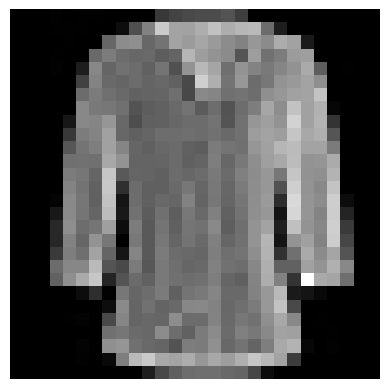

In [ ]:
for i in range(0, 5):
  print("Image nº {}".format(i))
  plt.imshow(X_test[i,:,:], cmap='gray')
  plt.axis('off')
  plt.show()
  print("\n")

# Exploratory Data Analysis

## 1. Label frequency

In [ ]:
# -- Train labels
y_train_df = pd.DataFrame({'label': y_train})
y_train_df['label_str'] = y_train_df['label'].map(LABEL_MAPPING)
y_train_df['label_str'].value_counts()

Ankle boot     6000
T-shirt/top    6000
Dress          6000
Pullover       6000
Sneaker        6000
Sandal         6000
Trouser        6000
Shirt          6000
Coat           6000
Bag            6000
Name: label_str, dtype: int64

In [ ]:
# -- Test labels
y_test_df = pd.DataFrame({'label': y_test})
y_test_df['label_str'] = y_test_df['label'].map(LABEL_MAPPING)
y_test_df['label_str'].value_counts()

Ankle boot     1000
Pullover       1000
Trouser        1000
Shirt          1000
Coat           1000
Sandal         1000
Sneaker        1000
Dress          1000
Bag            1000
T-shirt/top    1000
Name: label_str, dtype: int64

__NOTE: both datasets are balanced, in terms of original labels__

In [ ]:
y_train_df['category'] = y_train_df['label_str'].map(CATEGORY_MAPPING)
y_test_df['category']  = y_test_df['label_str'].map(CATEGORY_MAPPING)
y_train_df['category'].value_counts()

Upper part     24000
Footwear       18000
One piece       6000
Bottom part     6000
Bags            6000
Name: category, dtype: int64

In [ ]:
y_test_df['category'].value_counts()

Upper part     4000
Footwear       3000
Bottom part    1000
One piece      1000
Bags           1000
Name: category, dtype: int64

## 2. Duplicated images

In [ ]:
def duplicated_matrices(list_of_matrices):
    unique_matrices = set()
    for matriz in tqdm(list_of_matrices):
        matriz_hashable = tuple(map(tuple, matriz))
        if matriz_hashable in unique_matrices:
            return True
        unique_matrices.add(matriz_hashable)
    return False

In [ ]:
duplicated_matrices(X_train), duplicated_matrices(X_test)

100%|██████████| 10000/10000 [00:00<00:00, 10345.46it/s]


(False, False)

In [ ]:
def matrices_to_set(matrix_list):
    return {tuple(map(tuple, matrix)) for matrix in tqdm(matrix_list)}

X_train_set = matrices_to_set(X_train)
X_test_set = matrices_to_set(X_test)

if any(X_train_set.intersection(X_test_set)):
  print("At least one matrix from X_train is in X_test.")
else:
  print("No duplicated matrices from X_train in X_test")


if any(X_test_set.intersection(X_train_set)):
  print("At least one matrix from X_test is in X_train.")
else:
  print("No duplicated matrices from X_test in X_train")

100%|██████████| 10000/10000 [00:01<00:00, 5762.50it/s]

No duplicated matrices from X_train in X_test
No duplicated matrices from X_test in X_train


In [ ]:
duplicated_matrices(X_train)

__On the other hand, category distributions are unbalanced__

In [ ]:
np.max(X_train)

255

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
matrix_dict = {label: [] for label in set(y_train)}
for matrix, label in zip(X_train, y_train):
  matrix_dict[label].append(matrix)
mean_df = pd.DataFrame([{k: np.mean(matrix_dict[k]) for k in matrix_dict.keys()}]).T.reset_index()
mean_df.rename(columns={'index': 'label', 0: 'avg_pixel'}, inplace=True)
mean_df['label'] = mean_df['label'].map(LABEL_MAPPING)
mean_df['label'] = mean_df['label'].map(CATEGORY_MAPPING)

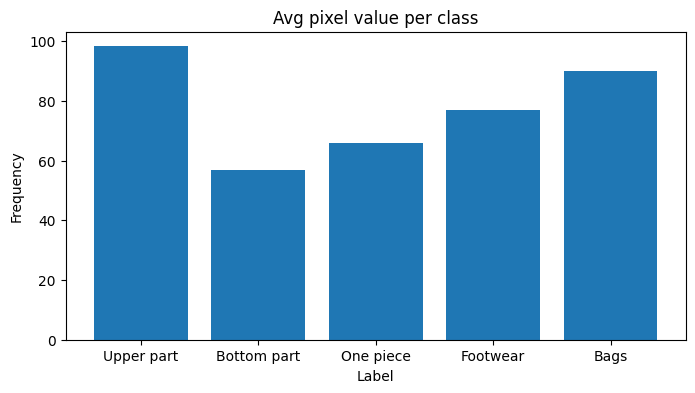

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(mean_df['label'], mean_df['avg_pixel'])
plt.title('Avg pixel value per class')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

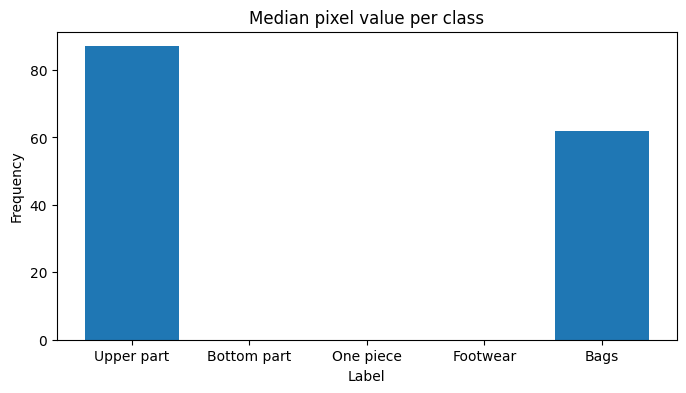

In [ ]:
median_df = pd.DataFrame([{k: np.median(matrix_dict[k]) for k in matrix_dict.keys()}]).T.reset_index()
median_df.rename(columns={'index': 'label', 0: 'median_pixel'}, inplace=True)
median_df['label'] = median_df['label'].map(LABEL_MAPPING)
median_df['label'] = median_df['label'].map(CATEGORY_MAPPING)

plt.figure(figsize=(8, 4))
plt.bar(median_df['label'], median_df['median_pixel'])
plt.title('Median pixel value per class')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

__The data need to be standarized__